In [37]:
import pandas as pd

gym_dataset_path = 'gym_exercise_data/megaGymDataset.csv'
tracking_dataset_path = 'gym_exercise_data/gym_members_exercise_tracking.csv'

gym_dataset = pd.read_csv(gym_dataset_path)
tracking_dataset = pd.read_csv(tracking_dataset_path)

tracking_dataset.head()
tracking_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    int64  
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [38]:
level_mapping = {1: 'Beginner', 2: 'Intermediate', 3: 'Advanced'}
tracking_dataset['Level'] = tracking_dataset['Level'].map(level_mapping)

tracking_dataset['Level'].value_counts()

Level
Intermediate    406
Beginner        376
Advanced        191
Name: count, dtype: int64

In [39]:
# Check unique values in the 'Level' column for both datasets
unique_levels_tracking = tracking_dataset['Level'].unique()
unique_levels_gym = gym_dataset['Level'].unique()

unique_levels_tracking, unique_levels_gym


(array(['Advanced', 'Intermediate', 'Beginner'], dtype=object),
 array(['Intermediate', 'Beginner', 'Expert'], dtype=object))

In [40]:
# Replace 'advanced' with 'expert' in the tracking dataset
tracking_dataset['Level'] = tracking_dataset['Level'].replace('Advanced', 'Expert')

# Verify unique values in the 'Level' column for both datasets
unique_levels_tracking = tracking_dataset['Level'].unique()
unique_levels_gym = gym_dataset['Level'].unique()

unique_levels_tracking, unique_levels_gym


(array(['Expert', 'Intermediate', 'Beginner'], dtype=object),
 array(['Intermediate', 'Beginner', 'Expert'], dtype=object))

In [41]:
tracking_dataset['Level'] = tracking_dataset['Level'].str.lower()
gym_dataset['Level'] = gym_dataset['Level'].str.lower()

merged_dataset = pd.merge( 
    tracking_dataset,
    gym_dataset,
    on='Level',
    how='inner')

merged_dataset.info()
merged_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168143 entries, 0 to 1168142
Data columns (total 23 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   Age                            1168143 non-null  int64  
 1   Gender                         1168143 non-null  object 
 2   Weight (kg)                    1168143 non-null  float64
 3   Height (m)                     1168143 non-null  float64
 4   Max_BPM                        1168143 non-null  int64  
 5   Avg_BPM                        1168143 non-null  int64  
 6   Resting_BPM                    1168143 non-null  int64  
 7   Session_Duration (hours)       1168143 non-null  float64
 8   Calories_Burned                1168143 non-null  int64  
 9   Workout_Type                   1168143 non-null  object 
 10  Fat_Percentage                 1168143 non-null  float64
 11  Water_Intake (liters)          1168143 non-null  float64
 12  Workout_Freque

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,Level,BMI,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Rating,RatingDesc
0,56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,...,expert,30.2,61,Dumbbell Get-Up Sit-Up,NaN,Strength,Abdominals,Dumbbell,NaN,NaN
1,56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,...,expert,30.2,1462,Assisted Single-Arm Pull-Up,NaN,Strength,Lats,Other,NaN,NaN
2,56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,...,expert,30.2,1463,Assisted Single-Arm Chin-Up,NaN,Strength,Lats,Other,NaN,NaN
3,56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,...,expert,30.2,1802,Power snatch-,The power snatch is a full-body lift in which ...,Olympic Weightlifting,Quadriceps,Barbell,9.3,Average
4,56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,...,expert,30.2,1806,Narrow-stance squat,The narrow-stance squat is an exercise that ta...,Strength,Quadriceps,Barbell,9.0,Average


In [42]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Take a random sample of 50,000 rows
sample_size = 50000  # You can adjust this size based on your system's capacity
sampled_dataset = merged_dataset.sample(n=sample_size, random_state=42)

# Step 2: Select relevant columns for features and target
columns_needed = ['Age', 'Weight (kg)', 'BMI', 'Workout_Type', 'Level', 'Title']
processed_dataset = sampled_dataset[columns_needed]

# Step 3: Drop rows with missing values
processed_dataset = processed_dataset.dropna()

# Step 4: Optimize data types
processed_dataset['Workout_Type'] = processed_dataset['Workout_Type'].astype('category')
processed_dataset['Level'] = processed_dataset['Level'].astype('category')
processed_dataset['Title'] = processed_dataset['Title'].astype('category')
processed_dataset['Age'] = processed_dataset['Age'].astype('int32')
processed_dataset['Weight (kg)'] = processed_dataset['Weight (kg)'].astype('float32')
processed_dataset['BMI'] = processed_dataset['BMI'].astype('float32')

# Step 5: Encode categorical variables
label_enc = LabelEncoder()
processed_dataset['Workout_Type'] = label_enc.fit_transform(processed_dataset['Workout_Type'])
processed_dataset['Level'] = label_enc.fit_transform(processed_dataset['Level'])
processed_dataset['Title'] = label_enc.fit_transform(processed_dataset['Title'])  # Target variable

# Step 6: Define features (X) and target (y)
X = processed_dataset[['Age', 'Weight (kg)', 'BMI', 'Workout_Type', 'Level']]
y = processed_dataset['Title']

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify the dataset size and memory usage
print("Processed Dataset:")
print(processed_dataset.info(memory_usage="deep"))
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")


Processed Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 729850 to 255149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           50000 non-null  int32  
 1   Weight (kg)   50000 non-null  float32
 2   BMI           50000 non-null  float32
 3   Workout_Type  50000 non-null  int64  
 4   Level         50000 non-null  int64  
 5   Title         50000 non-null  int64  
dtypes: float32(2), int32(1), int64(3)
memory usage: 2.1 MB
None
X_train: (40000, 5), X_test: (10000, 5)


In [43]:
# Check the number of unique classes in y
print(f"Number of unique classes in y: {y.nunique()}")

# Check class distribution
class_distribution = y.value_counts()
print("Class distribution:\n", class_distribution.head(20))  # Show the top 20 classes


Number of unique classes in y: 2909
Class distribution:
 Title
317     61
267     44
613     41
2254    38
2304    37
753     36
779     35
434     34
226     34
2456    32
2295    31
2212    30
824     30
710     30
2403    30
237     30
740     30
100     29
2256    29
1055    29
Name: count, dtype: int64


In [44]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Step 1: Group exercises into broader categories
# Replace 'Title' with a broader category like 'Type'
processed_dataset['Title'] = merged_dataset['Type'].astype('category').cat.codes  # Encode 'Type'

# Redefine features (X) and target (y)
X = processed_dataset[['Age', 'Weight (kg)', 'BMI', 'Workout_Type', 'Level']]
y = processed_dataset['Title']

# Step 2: Balance the data with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verify the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Step 3: Train-test split with balanced data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Display processed dataset info and train-test sizes
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")


Class distribution after SMOTE:
Title
4    43786
5    43786
2    43786
6    43786
1    43786
0    43786
3    43786
Name: count, dtype: int64
X_train: (245201, 5), X_test: (61301, 5)


In [45]:
# Replace Title with a broader category (e.g., 'Type' or 'BodyPart')
processed_dataset['Title'] = merged_dataset['Type'].astype('category').cat.codes  # Encode 'Type'

# Redefine X and y
X = processed_dataset[['Age', 'Weight (kg)', 'BMI', 'Workout_Type', 'Level']]
y = processed_dataset['Title']

# Check the new number of classes
print(f"New number of classes in y: {y.nunique()}")


New number of classes in y: 7


In [46]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the distribution of classes after SMOTE
print("Class distribution after SMOTE:\n", pd.Series(y_resampled).value_counts())


Class distribution after SMOTE:
 Title
4    43786
5    43786
2    43786
6    43786
1    43786
0    43786
3    43786
Name: count, dtype: int64


Model Accuracy: 59.59%
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.60      0.63      8757
           1       0.63      0.67      0.65      8757
           2       0.49      0.42      0.45      8757
           3       0.62      0.62      0.62      8758
           4       0.57      0.68      0.62      8757
           5       0.44      0.42      0.43      8757
           6       0.74      0.76      0.75      8758

    accuracy                           0.60     61301
   macro avg       0.59      0.60      0.59     61301
weighted avg       0.59      0.60      0.59     61301



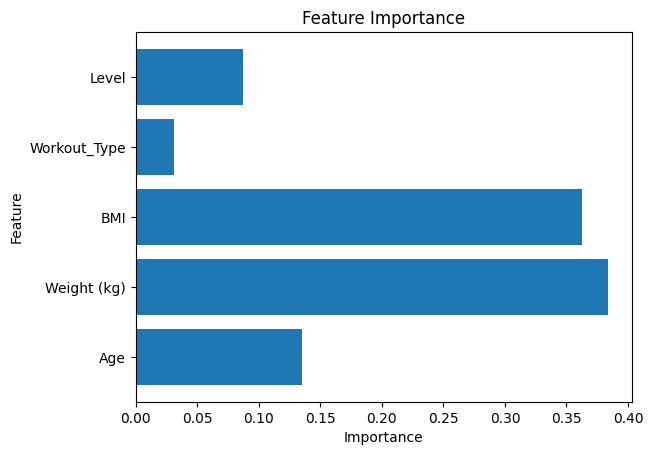

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

feature_importances = model.feature_importances_
feature_names = X_train.columns

plt.barh(feature_names, feature_importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

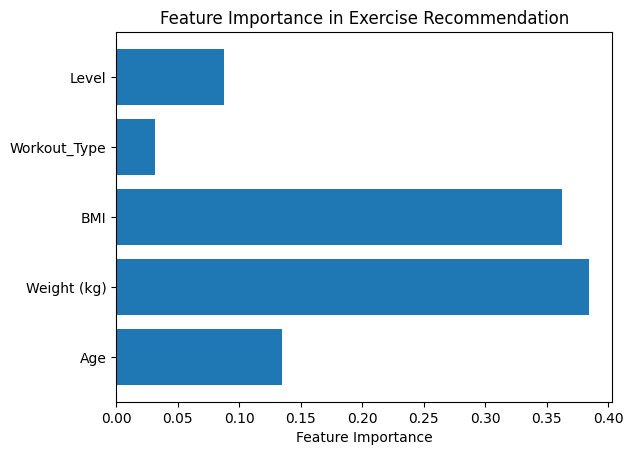

In [48]:
import matplotlib.pyplot as plt

# Feature Importance Plot
feature_importances = model.feature_importances_
plt.barh(X_train.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Exercise Recommendation")
plt.show()


In [49]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define a reduced parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=10,  # Test 10 random combinations
    cv=3,       # 3-fold cross-validation
    random_state=42,
    n_jobs=-1   # Use all CPUs for faster execution
)

# Fit the RandomizedSearchCV on the full dataset
random_search.fit(X_train, y_train)

# Retrieve the best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_
print("Best Parameters:", best_params)

# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {accuracy_best * 100:.2f}%")

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

/Users/adicadi/Aditya/FitnessTracker/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'max_depth': None}
Best Model Accuracy: 61.35%
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.64      0.65      8757
           1       0.64      0.71      0.67      8757
           2       0.53      0.42      0.47      8757
           3       0.63      0.65      0.64      8758
           4       0.57      0.68      0.62      8757
           5       0.48      0.40      0.43      8757
           6       0.73      0.80      0.76      8758

    accuracy                           0.61     61301
   macro avg       0.61      0.61      0.61     61301
weighted avg       0.61      0.61      0.61     61301



In [52]:
import xgboost as xgb
from sklearn.metrics import accuracy_score


# Add new features to the training and test datasets

# Feature 1: Weight-to-BMI Ratio
X_train['Weight_BMI_Ratio'] = X_train['Weight (kg)'] / X_train['BMI']
X_test['Weight_BMI_Ratio'] = X_test['Weight (kg)'] / X_test['BMI']

# Feature 2: Add session metrics if available in the dataset
if 'Session_Duration' in merged_dataset.columns:
    X_train['Session_Duration'] = merged_dataset.loc[X_train.index, 'Session_Duration']
    X_test['Session_Duration'] = merged_dataset.loc[X_test.index, 'Session_Duration']

if 'Calories_Burned' in merged_dataset.columns:
    X_train['Calories_Burned'] = merged_dataset.loc[X_train.index, 'Calories_Burned']
    X_test['Calories_Burned'] = merged_dataset.loc[X_test.index, 'Calories_Burned']

if 'Workout_Frequency' in merged_dataset.columns:
    X_train['Workout_Frequency'] = merged_dataset.loc[X_train.index, 'Workout_Frequency']
    X_test['Workout_Frequency'] = merged_dataset.loc[X_test.index, 'Workout_Frequency']

# Check the updated datasets
print(X_train.head())
print(X_test.head())




# Prepare the DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Define parameter grid
param_grid_xgb = {
    'max_depth': 10,
    'eta': 0.1,
    'objective': 'multi:softmax',  # For multi-class classification
    'num_class': len(y_train.unique()),
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Perform cross-validation
cv_results = xgb.cv(
    params=param_grid_xgb,
    dtrain=dtrain,
    num_boost_round=200,
    nfold=3,
    metrics='mlogloss',
    as_pandas=True,
    seed=42
)

# Train the best model on the training set
final_model = xgb.train(params=param_grid_xgb, dtrain=dtrain, num_boost_round=100)

# Make predictions on the test set
y_pred = final_model.predict(dtest)

# Evaluate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")


        Age  Weight (kg)        BMI  Workout_Type  Level  Weight_BMI_Ratio  \
255724   53   115.377541  31.294161             2      2          3.686871   
272776   45    56.921741  22.195047             0      0          2.564615   
148076   26    77.699997  29.610001             3      2          2.624113   
277473   27    60.175663  18.649960             1      0          3.226584   
73578    50    51.550735  17.525444             2      0          2.941480   

        Calories_Burned  
255724              887  
272776              900  
148076              858  
277473              940  
73578              1021  
        Age  Weight (kg)        BMI  Workout_Type  Level  Weight_BMI_Ratio  \
137505   22    42.799999  17.590000             2      2          2.433201   
96641    24    77.237785  24.761564             1      2          3.119261   
162867   30    64.099998  18.330000             3      0          3.497000   
302638   33    78.317390  28.558372             0      1       